In [1]:
import pandas as pd
import urllib.request
import re

data = pd.read_csv('./data/split/after_down_BCH2.csv', error_bad_lines=False)
#data = data.append(pd.read_csv('../../news/scraping_result/kr/2017_up1/2017_up1_(KR)Tokenpost.csv', error_bad_lines=False))


In [2]:
data = data.drop('Unnamed: 0',axis = 1)

In [3]:
data

,crypto,gubun,datetime,username,retweets,favorites,hashtags,text
0,BCH,down,2018-11-27 05:00:00,CryptoGulp,1,0,NaN,Top 5 Cryptocurrencies - Current Prices $BTC: ...
1,BCH,down,2018-11-27 05:00:03,allesovercrypto,0,1,#hardfork #softfork #BitcoinCash,Wat is een hard fork of een soft fork? $BTC #h...
2,BCH,down,2018-11-27 05:00:05,armondob,0,0,NaN,I liked a @YouTube video http://youtu.be/6pHYw...
3,BCH,down,2018-11-27 05:00:20,Criptomonedaico,0,0,#CriptomonedaseICO,#CriptomonedaseICO Bitcoin Cash Price Analysis...
4,BCH,down,2018-11-27 05:00:25,Criptomonedaico,0,0,#CriptoMonedaseICO #trader #trading #altcoin #...,#CriptoMonedaseICO Bitcoin Cash Price Analysis...
...,...,...,...,...,...,...,...,...
466,BCH,down,2018-11-27 10:51:22,bitcoinshitcoin,0,2,#Bitcoin #Bitcoin #BitcoinCash #cryptocurrency,#Bitcoin #BitcoinCash #cryptocurrency just for...
467,BCH,down,2018-11-27 10:53:12,coinspectator,0,0,#cryptocurrency #blockchain #altcoin,Bitcoin Cash (BCH) Hard Fork – What You Need t...
468,BCH,down,2018-11-27 10:54:11,CryptoAmb,0,0,#ETH #Ripple #BTC #BTC #Bitcoin #Bitcoin #Ethe...,Bitcoin [BTC] price can fall much lower and la...
469,BCH,down,2018-11-27 10:55:28,cointubeoffical,0,0,NaN,Why Bitcoin Cash SV is the only top coin risin...


In [4]:
pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+'

data['text'] = data['text'].apply(lambda x : re.sub(pattern=pattern, repl='', string=x ))
# text = re.sub(pattern=pattern, repl='', string=text)

In [5]:
text = data[['text']]
text['text'] = text.apply(lambda row: row['text'].replace("/"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("-"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("—"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("*"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("…"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("\\"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("#"," "), axis=1)



/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [6]:
import nltk
text['text'] = text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
text['text'] = text['text'].apply(lambda x : [word.lower().replace("-","") for word in x])
text['text'] = text['text'].apply(lambda x : [word for word in x if word])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [7]:
text['text']

0      [top, 5, cryptocurrencies, current, prices, $,...
1      [wat, is, een, hard, fork, of, een, soft, fork...
2      [i, liked, a, @, youtube, video, 6phyw2rvicc, ...
3      [criptomonedaseico, bitcoin, cash, price, anal...
4      [criptomonedaseico, bitcoin, cash, price, anal...
                             ...                        
466    [bitcoin, bitcoincash, cryptocurrency, just, f...
467    [bitcoin, cash, (, bch, ), hard, fork, –, what...
468    [bitcoin, [, btc, ], price, can, fall, much, l...
469    [why, bitcoin, cash, sv, is, the, only, top, c...
470    [[, nota, bene, ], aidus, aidusofficial, block...
Name: text, Length: 471, dtype: object

In [8]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['text']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
# 불용어 품사 제거
text['text'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['text'] = text['text'].apply(lambda x: [word for word in x if word not in (stop)])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
import csv
stopword_list =[]
f = open('../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['text'] = text['text'].apply(lambda x: [word for word in x if word not in stopword_list])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [12]:
text['text']

0      [top, cryptocurrencies, current, prices, $, bt...
1      [wat, een, hard, fork, een, soft, fork, ?, $, ...
2      [liked, @, youtube, video, ?, bitcoin, cash, e...
3      [criptomonedaseico, bitcoin, cash, price, anal...
4      [criptomonedaseico, bitcoin, cash, price, anal...
                             ...                        
466    [bitcoin, bitcoincash, cryptocurrency, giggles...
467    [bitcoin, cash, (, bch, ), hard, fork, –, need...
468    [bitcoin, [, btc, ], price, fall, lower, last,...
469    [bitcoin, cash, sv, top, coin, rising, crypto,...
470    [[, nota, bene, ], aidus, aidusofficial, block...
Name: text, Length: 471, dtype: object

In [13]:
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['text'] = text['text'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [14]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
native_number_pattern=re.compile(r'[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['text'] = text['text'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
from nltk.stem import WordNetLemmatizer
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [18]:
tokenized_doc = text['text'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [19]:
article_contents = tokenized_doc.values.tolist()

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [21]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [22]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [23]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [24]:
word2id = defaultdict(lambda: 0)

In [25]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [26]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [27]:
len(tf_idf_result)

1331

In [28]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

1331


In [29]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [30]:
sentences = article_contents

In [31]:
from gensim.models import Word2Vec

In [32]:
model = Word2Vec(sentences, min_count=1)

In [33]:
len(model.wv.vocab)

1331

In [34]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [35]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [36]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [37]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [38]:
temp_cluster_result['cluster'] = assigned_clusters

In [39]:
temp_cluster_result['raw_data'] = X.tolist()

In [40]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [41]:
from sklearn.metrics import pairwise_distances

In [42]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [43]:
len(cosine_centroid_list)

1331

In [44]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [45]:
sum(temp_distance[3])

72.92580967137309

In [46]:
import scipy.spatial.distance as dist

In [47]:
dist.cosine(X[0],cosine_centroid_list[0])

0.017645133712503647

In [48]:
dist.euclidean(X[0],cosine_centroid_list[0])

0.11587869012926341

In [49]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [50]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [51]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
749,"[-0.005309994798153639, -0.004341768566519022,...",crack,0,"[-0.00067691755, -0.0009623096, 9.061152e-05, ...",0.266478,0.002873,1.263605,NaN
850,"[-0.0001504464162280783, -0.003875550348311662...",abcが参照するチェーンをbitcoin,0,"[-0.00067691755, -0.0009623096, 9.061152e-05, ...",0.297568,0.001915,1.295653,NaN
1193,"[-0.00404469994828105, -0.0016857872251421213,...",experience,0,"[-0.00067691755, -0.0009623096, 9.061152e-05, ...",0.343284,0.000958,1.342327,NaN
1278,"[0.001097820932045579, 0.0016827558865770698, ...",ماینر,0,"[-0.00067691755, -0.0009623096, 9.061152e-05, ...",0.349753,0.001915,1.347838,NaN
624,"[-0.00213515292853117, 0.0005798698985017836, ...",court,0,"[-0.00067691755, -0.0009623096, 9.061152e-05, ...",0.354608,0.001915,1.352692,NaN
849,"[-0.005012522917240858, 0.0016650129109621048,...",コインチェックがハードフォークに伴う一部機能を再開した。bitcoin,0,"[-0.00067691755, -0.0009623096, 9.061152e-05, ...",0.353863,0.000958,1.352905,NaN
1103,"[-0.004380279686301947, -0.001072571612894535,...",siglas,0,"[-0.00067691755, -0.0009623096, 9.061152e-05, ...",0.354140,0.000958,1.353183,NaN
1054,"[-0.0035718311555683613, -0.003049840917810797...",clayton,0,"[-0.00067691755, -0.0009623096, 9.061152e-05, ...",0.367757,0.000958,1.366800,NaN
1330,"[0.0029320474714040756, -0.001183303538709879,...",bitcoininfo,0,"[-0.00067691755, -0.0009623096, 9.061152e-05, ...",0.387257,0.000958,1.386300,NaN
484,"[-0.003535505849868059, -0.004329427145421505,...",coinage,0,"[-0.00067691755, -0.0009623096, 9.061152e-05, ...",0.390597,0.001915,1.388682,NaN


In [52]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
522,"[0.0009312027832493186, 0.001792196067981422, ...",today,1,"[-0.00017890695, 0.00078181224, 0.00033819213,...",0.224248,0.003830,1.220417,NaN
36,"[0.0039049547631293535, -0.0027736870106309652...",transaction,1,"[-0.00017890695, 0.00078181224, 0.00033819213,...",0.308608,0.006703,1.301905,NaN
106,"[-0.0023807415273040533, 0.0037493794225156307...",make,1,"[-0.00017890695, 0.00078181224, 0.00033819213,...",0.316045,0.003830,1.312215,NaN
988,"[0.002515681553632021, -0.001317321788519621, ...",something,1,"[-0.00017890695, 0.00078181224, 0.00033819213,...",0.320187,0.000958,1.319230,NaN
226,"[0.0007629647152498364, -0.0013238894753158092...",debate,1,"[-0.00017890695, 0.00078181224, 0.00033819213,...",0.332355,0.001915,1.330439,NaN
123,"[0.0012996629811823368, -0.0012563866330310702...",consequence,1,"[-0.00017890695, 0.00078181224, 0.00033819213,...",0.356081,0.004788,1.351293,NaN
1186,"[-0.0009955154964700341, -0.004014392383396625...",อธิบาย,1,"[-0.00017890695, 0.00078181224, 0.00033819213,...",0.361828,0.000958,1.360870,NaN
1002,"[-0.002805516356602311, 0.0031411440577358007,...",болон,1,"[-0.00017890695, 0.00078181224, 0.00033819213,...",0.368196,0.000958,1.367238,NaN
1194,"[0.0005020656972192228, -0.002055370481684804,...",adopt,1,"[-0.00017890695, 0.00078181224, 0.00033819213,...",0.369780,0.000958,1.368822,NaN
1267,"[-0.0019610936287790537, -0.004313889425247908...",gtxproject,1,"[-0.00017890695, 0.00078181224, 0.00033819213,...",0.376256,0.000958,1.375298,NaN


In [53]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(20)   # 인플

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
551,"[-0.003007682738825679, -0.002959704026579857,...",month,2,"[8.56362e-06, -0.00074981176, 0.0004855663, -0...",0.235745,0.002873,1.232873,NaN
825,"[-0.000260553031694144, 0.002972689224407077, ...",algunas,2,"[8.56362e-06, -0.00074981176, 0.0004855663, -0...",0.325889,0.001915,1.323974,NaN
1185,"[0.0031572843436151743, 0.000942003505770117, ...",winter,2,"[8.56362e-06, -0.00074981176, 0.0004855663, -0...",0.337339,0.000958,1.336381,NaN
1312,"[0.0016931123100221157, -0.00497382041066885, ...",overtake,2,"[8.56362e-06, -0.00074981176, 0.0004855663, -0...",0.345216,0.001915,1.343300,NaN
862,"[-0.002123710233718157, -0.0042928243055939674...",normal,2,"[8.56362e-06, -0.00074981176, 0.0004855663, -0...",0.353811,0.001915,1.351896,NaN
1274,"[-0.000914438278414309, 8.89248913154006e-05, ...",tronfoundation,2,"[8.56362e-06, -0.00074981176, 0.0004855663, -0...",0.356332,0.000958,1.355375,NaN
1245,"[-0.001225941930897534, -0.002036496764048934,...",player,2,"[8.56362e-06, -0.00074981176, 0.0004855663, -0...",0.372926,0.000958,1.371969,NaN
442,"[-0.0055056288838386536, 0.0035535569768399, 0...",catch,2,"[8.56362e-06, -0.00074981176, 0.0004855663, -0...",0.399380,0.001915,1.397465,NaN
789,"[-0.00420760503038764, -0.0042066071182489395,...",tether,2,"[8.56362e-06, -0.00074981176, 0.0004855663, -0...",0.406916,0.001915,1.405001,NaN
644,"[-0.003453123616054654, -0.004322093911468983,...",прогноз,2,"[8.56362e-06, -0.00074981176, 0.0004855663, -0...",0.407348,0.001915,1.405433,NaN


In [54]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(20)  # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
3,"[-0.02003411576151848, 0.0004119043005630374, ...",bitcoin,3,"[-0.0014790737, -0.00027847936, 0.0012776186, ...",0.001635,0.775647,0.225988,NaN
5,"[-0.015647517517209053, -0.0004212450003251433...",cash,3,"[-0.0014790737, -0.00027847936, 0.0012776186, ...",0.002022,0.422297,0.579726,NaN
2,"[-0.006032799836248159, -0.006525540724396706,...",price,3,"[-0.0014790737, -0.00027847936, 0.0012776186, ...",0.013431,0.219288,0.794143,NaN
4,"[-0.01843445561826229, 4.6131390263326466e-05,...",ethereum,3,"[-0.0014790737, -0.00027847936, 0.0012776186, ...",0.004001,0.190560,0.813441,NaN
11,"[-0.013369541615247726, -0.0007159679080359638...",bitcoincash,3,"[-0.0014790737, -0.00027847936, 0.0012776186, ...",0.003516,0.162790,0.840726,NaN
42,"[-0.011229181662201881, -0.006613191217184067,...",crypto,3,"[-0.0014790737, -0.00027847936, 0.0012776186, ...",0.003476,0.150341,0.853134,NaN
41,"[-0.010937275364995003, 0.0017368360422551632,...",litecoin,3,"[-0.0014790737, -0.00027847936, 0.0012776186, ...",0.009029,0.110123,0.898907,NaN
31,"[-0.015698177739977837, -0.00098133843857795, ...",cryptocurrency,3,"[-0.0014790737, -0.00027847936, 0.0012776186, ...",0.005141,0.090013,0.915127,NaN
40,"[-0.014659743756055832, 0.002510670106858015, ...",ripple,3,"[-0.0014790737, -0.00027847936, 0.0012776186, ...",0.004996,0.083310,0.921685,NaN
32,"[-0.004140425473451614, 0.002852038946002722, ...",blockchain,3,"[-0.0014790737, -0.00027847936, 0.0012776186, ...",0.008124,0.073734,0.934390,NaN


In [55]:
y_km = temp_cluster_result['cluster'].values

In [56]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

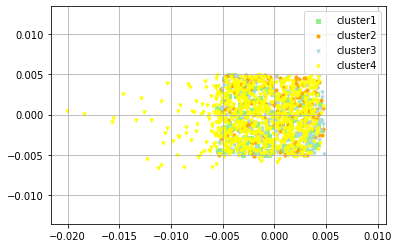

In [57]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [58]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 이슈

176

In [59]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 이슈

200

In [60]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 인플

200

In [61]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 투자

755

In [62]:
temp_cluster_result['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [63]:
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 5 # 이슈

In [64]:
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 5 # 이슈

In [65]:
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label'] = 6 # 인플

In [66]:
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 11 # 투자

In [67]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(n_clusters=4)

In [68]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [69]:
kmeans.inertia_

1.4241479635238647

In [70]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[3 2 3 ... 2 2 2]


In [71]:
cluster_values= list(model.wv.vocab)

In [72]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-1.4241482019424438


In [73]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [74]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.3389301


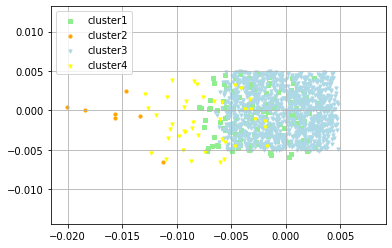

In [75]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [76]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [77]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [78]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [79]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [80]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [81]:
import scipy.spatial.distance as dist

In [82]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [83]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [84]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(50,'score') # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
21,"[-0.0013434914872050285, 0.0009406624594703317...",climb,0,"[-0.002378829, -0.000636355, 0.0021386826, -0....",0.040332,0.044049,0.996283,NaN
43,"[-0.0045270840637385845, -0.000994685455225408...",change,0,"[-0.002378829, -0.000636355, 0.0021386826, -0....",0.031704,0.017237,1.014468,NaN
73,"[-0.002951676258817315, 0.0025772382505238056,...",iota,0,"[-0.002378829, -0.000636355, 0.0021386826, -0....",0.039120,0.022982,1.016138,NaN
88,"[-0.0011856888886541128, -0.002259638858959079...",result,0,"[-0.002378829, -0.000636355, 0.0021386826, -0....",0.029036,0.010533,1.018502,NaN
80,"[-0.0018321118550375104, 0.0022097514010965824...",reddits,0,"[-0.002378829, -0.000636355, 0.0021386826, -0....",0.030428,0.010533,1.019895,NaN
23,"[-0.00708744628354907, 0.00010490324348211288,...",criptomonedas,0,"[-0.002378829, -0.000636355, 0.0021386826, -0....",0.027573,0.007661,1.019912,NaN
383,"[-0.005802843254059553, -0.0023083421401679516...",cryptocurrencynews,0,"[-0.002378829, -0.000636355, 0.0021386826, -0....",0.027658,0.007661,1.019997,NaN
589,"[0.0017180406721308827, -0.003892771899700165,...",dust,0,"[-0.002378829, -0.000636355, 0.0021386826, -0....",0.031496,0.011491,1.020005,NaN
244,"[-0.006769013125449419, -0.004505087621510029,...",list,0,"[-0.002378829, -0.000636355, 0.0021386826, -0....",0.026721,0.006703,1.020018,NaN
269,"[-0.0048347655683755875, -0.001714397338218987...",daily,0,"[-0.002378829, -0.000636355, 0.0021386826, -0....",0.029915,0.009576,1.020339,NaN


In [85]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(20,'score') # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
3,"[-0.02003411576151848, 0.0004119043005630374, ...",bitcoin,1,"[-0.015581819, -0.000823291, 0.012021774, -0.0...",0.242084,0.775647,0.466436,NaN
5,"[-0.015647517517209053, -0.0004212450003251433...",cash,1,"[-0.015581819, -0.000823291, 0.012021774, -0.0...",0.085508,0.422297,0.663211,NaN
4,"[-0.01843445561826229, 4.6131390263326466e-05,...",ethereum,1,"[-0.015581819, -0.000823291, 0.012021774, -0.0...",0.049090,0.190560,0.858530,NaN
11,"[-0.013369541615247726, -0.0007159679080359638...",bitcoincash,1,"[-0.015581819, -0.000823291, 0.012021774, -0.0...",0.042268,0.162790,0.879477,NaN
42,"[-0.011229181662201881, -0.006613191217184067,...",crypto,1,"[-0.015581819, -0.000823291, 0.012021774, -0.0...",0.049924,0.150341,0.899582,NaN
31,"[-0.015698177739977837, -0.00098133843857795, ...",cryptocurrency,1,"[-0.015581819, -0.000823291, 0.012021774, -0.0...",0.105232,0.090013,1.015219,NaN
40,"[-0.014659743756055832, 0.002510670106858015, ...",ripple,1,"[-0.015581819, -0.000823291, 0.012021774, -0.0...",0.109396,0.083310,1.026086,NaN


In [86]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(20,'score')  # 인플

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
36,"[0.0039049547631293535, -0.0027736870106309652...",transaction,2,"[-0.00045178639, -0.0001917629, 0.00045267708,...",0.030500,0.006703,1.023797,NaN
1248,"[-0.0002864797133952379, -1.4315166481537744e-...",подпишись,2,"[-0.00045178639, -0.0001917629, 0.00045267708,...",0.024898,0.000958,1.023940,NaN
612,"[0.0034268249291926622, -0.0028338234405964613...",hangisi,2,"[-0.00045178639, -0.0001917629, 0.00045267708,...",0.027914,0.003830,1.024084,NaN
1252,"[5.194421828491613e-05, -0.0001498831843491643...",биткоин,2,"[-0.00045178639, -0.0001917629, 0.00045267708,...",0.025326,0.000958,1.024368,NaN
762,"[0.000739481532946229, 1.0336183549952693e-05,...",future,2,"[-0.00045178639, -0.0001917629, 0.00045267708,...",0.027253,0.002873,1.024380,NaN
721,"[0.0034423326142132282, 0.0008721730555407703,...",freecoin,2,"[-0.00045178639, -0.0001917629, 0.00045267708,...",0.026304,0.001915,1.024389,NaN
1066,"[-0.003706099931150675, -0.0008728715474717319...",brevemente,2,"[-0.00045178639, -0.0001917629, 0.00045267708,...",0.026366,0.001915,1.024451,NaN
101,"[0.0012335325591266155, -0.0040208869613707066...",instacrypto,2,"[-0.00045178639, -0.0001917629, 0.00045267708,...",0.028330,0.003830,1.024499,NaN
480,"[0.0007043860387057066, 0.0010668853064998984,...",admin,2,"[-0.00045178639, -0.0001917629, 0.00045267708,...",0.025477,0.000958,1.024519,NaN
359,"[-0.0017122370190918446, -0.003257949138060212...",coinex,2,"[-0.00045178639, -0.0001917629, 0.00045267708,...",0.027414,0.002873,1.024542,NaN


In [87]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 거래소 돈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2,"[-0.006032799836248159, -0.006525540724396706,...",price,3,"[-0.0075482894, -0.0014325898, 0.00591801, -0....",0.047801,0.219288,0.828513,NaN
41,"[-0.010937275364995003, 0.0017368360422551632,...",litecoin,3,"[-0.0075482894, -0.0014325898, 0.00591801, -0....",0.075149,0.110123,0.965027,NaN
20,"[-0.005889966618269682, 0.0010888405377045274,...",analysis,3,"[-0.0075482894, -0.0014325898, 0.00591801, -0....",0.049094,0.077565,0.971529,NaN
16,"[-0.008185896091163158, 0.003360138740390539, ...",market,3,"[-0.0075482894, -0.0014325898, 0.00591801, -0....",0.031198,0.051710,0.979488,NaN
0,"[-0.010426903143525124, 0.003881220007315278, ...",cryptocurrencies,3,"[-0.0075482894, -0.0014325898, 0.00591801, -0....",0.036431,0.047879,0.988552,NaN
111,"[-0.01291760802268982, 0.0020929088350385427, ...",stellar,3,"[-0.0075482894, -0.0014325898, 0.00591801, -0....",0.046469,0.050752,0.995717,NaN
76,"[-0.004692940507084131, -0.004472432192414999,...",craig,3,"[-0.0075482894, -0.0014325898, 0.00591801, -0....",0.031915,0.034473,0.997442,NaN
32,"[-0.004140425473451614, 0.002852038946002722, ...",blockchain,3,"[-0.0075482894, -0.0014325898, 0.00591801, -0....",0.071414,0.073734,0.997680,NaN
77,"[-0.008728323504328728, -0.00644912663847208, ...",wright,3,"[-0.0075482894, -0.0014325898, 0.00591801, -0....",0.036458,0.034473,1.001984,NaN
72,"[-0.004681446589529514, 0.003265285398811102, ...",cardano,3,"[-0.0075482894, -0.0014325898, 0.00591801, -0....",0.051197,0.047879,1.003318,NaN


In [92]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) # 이슈

141

In [93]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) # 투자

7

In [94]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) # 인플

1142

In [95]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) # 거래소

41

In [96]:
temp_cluster_result1['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [97]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 5 # 이슈

In [98]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 11 # 투자

In [99]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 6 # 인플

In [100]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 12 # 거래소

In [101]:
temp_cluster_result1['Silhouette'] = 0.3389301
temp_cluster_result['Silhouette'] = 0.3389301
temp_cluster_result1['result'] = 2
temp_cluster_result['result'] = 2

In [102]:
temp_cluster_result1.to_csv("../analysis/cluster/causeanalysis/BTC/after_down_BCH2_euclidean.csv")
temp_cluster_result.to_csv("../analysis/cluster/causeanalysis/BTC/after_down_BCH2_cosine")